# Generative Adversarial Nets

- [Paper](https://arxiv.org/abs/1406.2661)




A GAN contains two models with the opposing goals. The discriminator's (D) goal is to determine which inputs come from the set of real data and which inputs are fake. The generator's (G) goal is maximize the probability of D making a mistake. The competition forms a two player minimax game.

- generative model: **G**
- discriminator model: **D**


### Game value function

$$\min _{G} \max _{D} V(D, G)=\mathbb{E}_{\boldsymbol{x} \sim p_{\text {data }}(\boldsymbol{x})}[\log D(\boldsymbol{x})]+\mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}(\boldsymbol{z})}[\log (1-D(G(\boldsymbol{z})))]$$

### Training
During training **D** is updated by gradient ascent training on a sample of generated samples and true samples for some *k* steps, then **G** is updated by gradient descent using the results of **D** to move towards results that are more likely to confuse **D**.
- pass zero information noise to the generator. over time it learns to add structure/information to the input noise in order to fool the discriminator
- the value function is the sum of BCE loss for the generator and discriminator simplified give the data labels y=1 for real data and y=0 for fake/generated data.



In [9]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


(28, 28)

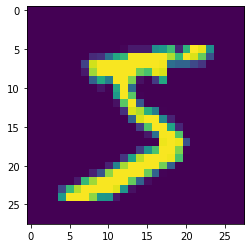

In [11]:
plt.imshow(x_train[0]);
x_train[0].shape

In [12]:
train_data, test_data = tf.keras.datasets.mnist.load_data()
train_data = tf.data.Dataset.from_tensor_slices(train_data)
len(train_data)

60000

- Now you have to keep two neural nets in balance. 

In [13]:
# Generator

inputs = tf.keras.Input(shape=(28, 28, 1,))
x = layers.Flatten()(inputs)
x = layers.Dense(256, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(28**2, activation="tanh")(x)
outputs = layers.Reshape((28,28,1))(x)

generator = tf.keras.Model(inputs=inputs, outputs=outputs)

generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               6579

In [14]:
# Discriminator
inputs = tf.keras.Input(shape=(28, 28, 1,))
x = layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

discriminator = tf.keras.Model(inputs=inputs, outputs=outputs)

discriminator.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257 

In [15]:
# gen_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
# disc_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

gen_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
disc_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)


Epoch: 0	Loss:	disc total: 1.253e-01	gen: 2.004e+00	disc real: 1.491e-02	disc fake: 2.356e-01


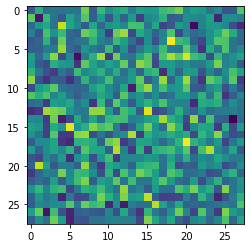

Epoch: 1	Loss:	disc total: 5.408e-02	gen: 3.143e+00	disc real: 1.359e-03	disc fake: 1.068e-01
Epoch: 2	Loss:	disc total: 5.997e-02	gen: 4.042e+00	disc real: 4.519e-03	disc fake: 1.154e-01
Epoch: 3	Loss:	disc total: 5.462e-01	gen: 2.772e+00	disc real: 6.950e-01	disc fake: 3.974e-01
Epoch: 4	Loss:	disc total: 1.300e-01	gen: 4.737e+00	disc real: 4.050e-02	disc fake: 2.195e-01
Epoch: 5	Loss:	disc total: 1.517e-01	gen: 3.385e+00	disc real: 1.382e-01	disc fake: 1.653e-01
Epoch: 6	Loss:	disc total: 2.798e-01	gen: 2.781e+00	disc real: 1.170e-01	disc fake: 4.427e-01
Epoch: 7	Loss:	disc total: 3.269e-01	gen: 2.653e+00	disc real: 2.863e-01	disc fake: 3.675e-01
Epoch: 8	Loss:	disc total: 9.452e-01	gen: 2.011e+00	disc real: 9.035e-01	disc fake: 9.869e-01
Epoch: 9	Loss:	disc total: 3.823e-01	gen: 2.367e+00	disc real: 2.585e-01	disc fake: 5.061e-01
Epoch: 10	Loss:	disc total: 2.731e-01	gen: 2.977e+00	disc real: 2.684e-01	disc fake: 2.779e-01


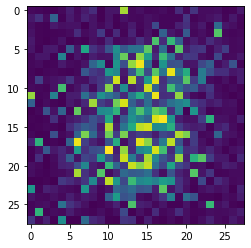

Epoch: 11	Loss:	disc total: 4.357e-01	gen: 3.052e+00	disc real: 2.668e-01	disc fake: 6.046e-01
Epoch: 12	Loss:	disc total: 5.886e-01	gen: 2.486e+00	disc real: 2.831e-01	disc fake: 8.942e-01
Epoch: 13	Loss:	disc total: 5.067e-01	gen: 4.193e+00	disc real: 4.797e-01	disc fake: 5.337e-01
Epoch: 14	Loss:	disc total: 3.843e-01	gen: 2.401e+00	disc real: 4.243e-01	disc fake: 3.443e-01
Epoch: 15	Loss:	disc total: 3.421e-01	gen: 3.367e+00	disc real: 4.678e-01	disc fake: 2.163e-01
Epoch: 16	Loss:	disc total: 3.451e-01	gen: 4.423e+00	disc real: 4.741e-01	disc fake: 2.160e-01
Epoch: 17	Loss:	disc total: 8.235e-02	gen: 4.853e+00	disc real: 1.349e-01	disc fake: 2.984e-02
Epoch: 18	Loss:	disc total: 2.509e-01	gen: 2.810e+00	disc real: 3.163e-02	disc fake: 4.701e-01
Epoch: 19	Loss:	disc total: 2.867e-01	gen: 2.348e+00	disc real: 2.206e-01	disc fake: 3.529e-01
Epoch: 20	Loss:	disc total: 3.768e-01	gen: 3.177e+00	disc real: 5.637e-01	disc fake: 1.899e-01


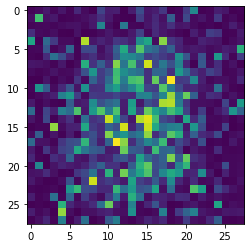

Epoch: 21	Loss:	disc total: 1.171e-01	gen: 4.048e+00	disc real: 8.530e-02	disc fake: 1.489e-01
Epoch: 22	Loss:	disc total: 1.184e-02	gen: 6.752e+00	disc real: 1.444e-03	disc fake: 2.224e-02
Epoch: 23	Loss:	disc total: 1.063e-01	gen: 3.927e+00	disc real: 9.662e-02	disc fake: 1.160e-01
Epoch: 24	Loss:	disc total: 7.330e-02	gen: 4.849e+00	disc real: 7.786e-02	disc fake: 6.873e-02
Epoch: 25	Loss:	disc total: 3.354e-01	gen: 1.919e+00	disc real: 1.104e-01	disc fake: 5.605e-01
Epoch: 26	Loss:	disc total: 4.586e-02	gen: 4.595e+00	disc real: 5.091e-02	disc fake: 4.080e-02
Epoch: 27	Loss:	disc total: 8.330e-02	gen: 4.281e+00	disc real: 1.103e-01	disc fake: 5.626e-02
Epoch: 28	Loss:	disc total: 1.078e-01	gen: 2.780e+00	disc real: 2.283e-02	disc fake: 1.927e-01
Epoch: 29	Loss:	disc total: 1.698e-02	gen: 6.022e+00	disc real: 1.128e-02	disc fake: 2.269e-02
Epoch: 30	Loss:	disc total: 2.627e-01	gen: 2.492e+00	disc real: 3.026e-01	disc fake: 2.227e-01


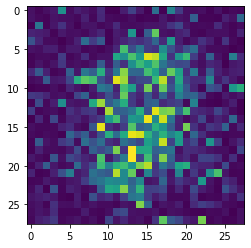

Epoch: 31	Loss:	disc total: 2.318e-01	gen: 2.992e+00	disc real: 1.885e-01	disc fake: 2.750e-01
Epoch: 32	Loss:	disc total: 3.963e-02	gen: 3.667e+00	disc real: 4.113e-02	disc fake: 3.814e-02
Epoch: 33	Loss:	disc total: 2.476e-02	gen: 5.655e+00	disc real: 1.055e-03	disc fake: 4.847e-02
Epoch: 34	Loss:	disc total: 7.992e-01	gen: 2.155e+00	disc real: 6.634e-01	disc fake: 9.351e-01
Epoch: 35	Loss:	disc total: 4.346e-01	gen: 2.751e+00	disc real: 4.429e-01	disc fake: 4.263e-01
Epoch: 36	Loss:	disc total: 2.057e-01	gen: 3.255e+00	disc real: 2.059e-01	disc fake: 2.056e-01
Epoch: 37	Loss:	disc total: 1.204e-01	gen: 3.248e+00	disc real: 1.830e-01	disc fake: 5.787e-02
Epoch: 38	Loss:	disc total: 7.367e-02	gen: 2.680e+00	disc real: 1.618e-02	disc fake: 1.312e-01
Epoch: 39	Loss:	disc total: 1.279e-01	gen: 2.823e+00	disc real: 1.366e-01	disc fake: 1.192e-01
Epoch: 40	Loss:	disc total: 5.650e-03	gen: 8.669e+00	disc real: 8.921e-03	disc fake: 2.378e-03


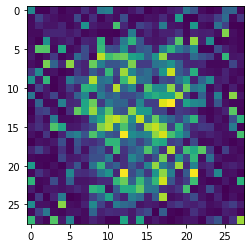

Epoch: 41	Loss:	disc total: 2.655e-01	gen: 3.759e+00	disc real: 1.621e-01	disc fake: 3.688e-01
Epoch: 42	Loss:	disc total: 9.935e-02	gen: 3.447e+00	disc real: 3.582e-02	disc fake: 1.629e-01
Epoch: 43	Loss:	disc total: 1.294e-01	gen: 4.604e+00	disc real: 1.895e-01	disc fake: 6.919e-02
Epoch: 44	Loss:	disc total: 1.170e-02	gen: 5.732e+00	disc real: 2.950e-05	disc fake: 2.337e-02
Epoch: 45	Loss:	disc total: 8.899e-02	gen: 7.919e+00	disc real: 2.639e-03	disc fake: 1.753e-01
Epoch: 46	Loss:	disc total: 2.029e-01	gen: 2.907e+00	disc real: 3.309e-01	disc fake: 7.485e-02
Epoch: 47	Loss:	disc total: 1.947e-01	gen: 3.409e+00	disc real: 3.374e-01	disc fake: 5.196e-02
Epoch: 48	Loss:	disc total: 3.450e-02	gen: 3.807e+00	disc real: 2.785e-02	disc fake: 4.116e-02
Epoch: 49	Loss:	disc total: 5.529e-02	gen: 4.120e+00	disc real: 5.923e-02	disc fake: 5.135e-02
Epoch: 50	Loss:	disc total: 4.131e-02	gen: 4.326e+00	disc real: 4.551e-03	disc fake: 7.808e-02


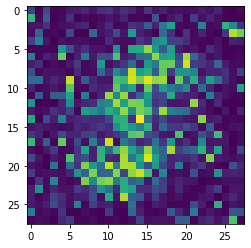

Epoch: 51	Loss:	disc total: 9.470e-03	gen: 6.519e+00	disc real: 1.087e-02	disc fake: 8.068e-03
Epoch: 52	Loss:	disc total: 1.891e-02	gen: 6.727e+00	disc real: 2.864e-02	disc fake: 9.184e-03
Epoch: 53	Loss:	disc total: 5.826e-02	gen: 4.983e+00	disc real: 9.713e-03	disc fake: 1.068e-01
Epoch: 54	Loss:	disc total: 2.322e-01	gen: 4.273e+00	disc real: 4.468e-01	disc fake: 1.767e-02
Epoch: 55	Loss:	disc total: 5.618e-02	gen: 3.718e+00	disc real: 1.969e-03	disc fake: 1.104e-01
Epoch: 56	Loss:	disc total: 3.855e-02	gen: 4.100e+00	disc real: 1.047e-02	disc fake: 6.663e-02
Epoch: 57	Loss:	disc total: 4.868e-02	gen: 5.778e+00	disc real: 3.045e-02	disc fake: 6.690e-02
Epoch: 58	Loss:	disc total: 4.535e-02	gen: 4.670e+00	disc real: 5.020e-03	disc fake: 8.568e-02
Epoch: 59	Loss:	disc total: 1.531e-01	gen: 3.170e+00	disc real: 3.259e-03	disc fake: 3.030e-01
Epoch: 60	Loss:	disc total: 7.560e-02	gen: 5.195e+00	disc real: 1.159e-01	disc fake: 3.526e-02


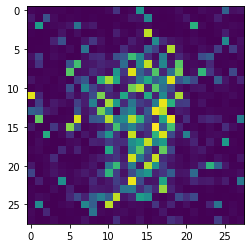

Epoch: 61	Loss:	disc total: 1.004e-01	gen: 2.880e+00	disc real: 2.115e-03	disc fake: 1.987e-01
Epoch: 62	Loss:	disc total: 5.489e-02	gen: 3.818e+00	disc real: 2.181e-02	disc fake: 8.796e-02
Epoch: 63	Loss:	disc total: 5.174e-02	gen: 2.819e+00	disc real: 5.112e-02	disc fake: 5.235e-02
Epoch: 64	Loss:	disc total: 1.580e-01	gen: 3.745e+00	disc real: 1.703e-01	disc fake: 1.457e-01
Epoch: 65	Loss:	disc total: 2.788e-02	gen: 3.902e+00	disc real: 5.458e-03	disc fake: 5.031e-02
Epoch: 66	Loss:	disc total: 3.664e-01	gen: 3.528e+00	disc real: 1.474e-03	disc fake: 7.313e-01
Epoch: 67	Loss:	disc total: 9.554e-02	gen: 4.473e+00	disc real: 1.209e-03	disc fake: 1.899e-01
Epoch: 68	Loss:	disc total: 2.818e-01	gen: 3.950e+00	disc real: 5.234e-01	disc fake: 4.022e-02
Epoch: 69	Loss:	disc total: 3.960e-02	gen: 5.129e+00	disc real: 4.552e-02	disc fake: 3.369e-02
Epoch: 70	Loss:	disc total: 2.865e-02	gen: 5.188e+00	disc real: 1.153e-02	disc fake: 4.577e-02


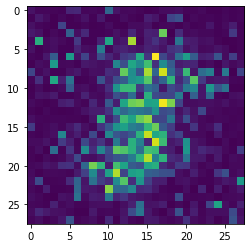

Epoch: 71	Loss:	disc total: 1.401e-01	gen: 5.288e+00	disc real: 2.683e-01	disc fake: 1.200e-02
Epoch: 72	Loss:	disc total: 3.270e-02	gen: 5.392e+00	disc real: 4.920e-04	disc fake: 6.492e-02
Epoch: 73	Loss:	disc total: 6.383e-02	gen: 4.269e+00	disc real: 6.500e-02	disc fake: 6.265e-02
Epoch: 74	Loss:	disc total: 1.254e-01	gen: 5.522e+00	disc real: 2.480e-01	disc fake: 2.925e-03
Epoch: 75	Loss:	disc total: 1.432e-02	gen: 6.247e+00	disc real: 1.975e-02	disc fake: 8.886e-03
Epoch: 76	Loss:	disc total: 1.889e-02	gen: 4.298e+00	disc real: 3.965e-03	disc fake: 3.382e-02
Epoch: 77	Loss:	disc total: 9.228e-02	gen: 3.933e+00	disc real: 4.271e-03	disc fake: 1.803e-01
Epoch: 78	Loss:	disc total: 5.439e-02	gen: 5.320e+00	disc real: 2.168e-02	disc fake: 8.711e-02
Epoch: 79	Loss:	disc total: 2.110e-02	gen: 5.058e+00	disc real: 9.232e-03	disc fake: 3.296e-02
Epoch: 80	Loss:	disc total: 2.975e-02	gen: 4.137e+00	disc real: 1.302e-02	disc fake: 4.647e-02


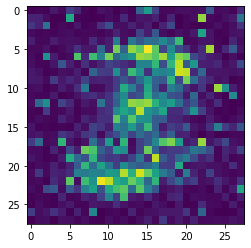

Epoch: 81	Loss:	disc total: 3.166e-01	gen: 4.293e+00	disc real: 6.209e-01	disc fake: 1.240e-02
Epoch: 82	Loss:	disc total: 1.882e-02	gen: 4.502e+00	disc real: 2.064e-03	disc fake: 3.557e-02
Epoch: 83	Loss:	disc total: 1.134e-01	gen: 3.854e+00	disc real: 1.680e-01	disc fake: 5.888e-02
Epoch: 84	Loss:	disc total: 3.916e-02	gen: 4.913e+00	disc real: 1.407e-02	disc fake: 6.426e-02
Epoch: 85	Loss:	disc total: 9.248e-02	gen: 4.852e+00	disc real: 1.401e-01	disc fake: 4.485e-02
Epoch: 86	Loss:	disc total: 1.265e-01	gen: 4.831e+00	disc real: 2.296e-01	disc fake: 2.340e-02
Epoch: 87	Loss:	disc total: 2.096e-02	gen: 4.774e+00	disc real: 3.855e-05	disc fake: 4.189e-02
Epoch: 88	Loss:	disc total: 4.093e-02	gen: 3.921e+00	disc real: 1.885e-02	disc fake: 6.302e-02
Epoch: 89	Loss:	disc total: 1.281e-01	gen: 4.811e+00	disc real: 5.535e-03	disc fake: 2.507e-01
Epoch: 90	Loss:	disc total: 7.809e-02	gen: 3.562e+00	disc real: 1.000e-01	disc fake: 5.617e-02


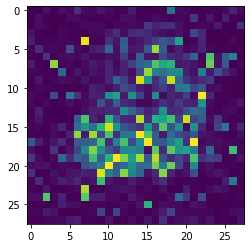

Epoch: 91	Loss:	disc total: 1.678e-01	gen: 4.557e+00	disc real: 1.006e-03	disc fake: 3.347e-01
Epoch: 92	Loss:	disc total: 1.025e-01	gen: 3.723e+00	disc real: 1.648e-01	disc fake: 4.020e-02
Epoch: 93	Loss:	disc total: 4.518e-02	gen: 4.108e+00	disc real: 3.358e-03	disc fake: 8.701e-02
Epoch: 94	Loss:	disc total: 7.315e-02	gen: 5.491e+00	disc real: 5.729e-02	disc fake: 8.900e-02
Epoch: 95	Loss:	disc total: 2.324e-01	gen: 3.909e+00	disc real: 5.367e-02	disc fake: 4.112e-01
Epoch: 96	Loss:	disc total: 1.295e-01	gen: 4.629e+00	disc real: 1.767e-01	disc fake: 8.228e-02
Epoch: 97	Loss:	disc total: 7.294e-02	gen: 3.928e+00	disc real: 5.947e-02	disc fake: 8.642e-02
Epoch: 98	Loss:	disc total: 1.963e-01	gen: 4.478e+00	disc real: 6.518e-03	disc fake: 3.861e-01
Epoch: 99	Loss:	disc total: 5.846e-02	gen: 5.024e+00	disc real: 4.461e-03	disc fake: 1.125e-01
Epoch: 100	Loss:	disc total: 9.201e-02	gen: 4.785e+00	disc real: 1.522e-01	disc fake: 3.186e-02


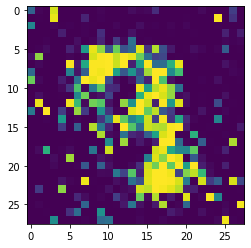

Epoch: 101	Loss:	disc total: 6.715e-02	gen: 3.143e+00	disc real: 7.048e-02	disc fake: 6.382e-02
Epoch: 102	Loss:	disc total: 8.787e-02	gen: 5.475e+00	disc real: 7.128e-03	disc fake: 1.686e-01
Epoch: 103	Loss:	disc total: 1.032e-01	gen: 3.081e+00	disc real: 5.591e-03	disc fake: 2.009e-01
Epoch: 104	Loss:	disc total: 5.467e-02	gen: 4.907e+00	disc real: 4.522e-02	disc fake: 6.413e-02
Epoch: 105	Loss:	disc total: 9.722e-02	gen: 4.031e+00	disc real: 9.507e-03	disc fake: 1.849e-01
Epoch: 106	Loss:	disc total: 7.535e-02	gen: 2.974e+00	disc real: 5.202e-02	disc fake: 9.868e-02
Epoch: 107	Loss:	disc total: 2.276e-02	gen: 5.648e+00	disc real: 4.130e-04	disc fake: 4.511e-02
Epoch: 108	Loss:	disc total: 6.143e-01	gen: 4.015e+00	disc real: 1.182e+00	disc fake: 4.633e-02
Epoch: 109	Loss:	disc total: 2.116e-01	gen: 2.816e+00	disc real: 2.286e-01	disc fake: 1.947e-01
Epoch: 110	Loss:	disc total: 1.306e-01	gen: 3.468e+00	disc real: 1.140e-01	disc fake: 1.472e-01


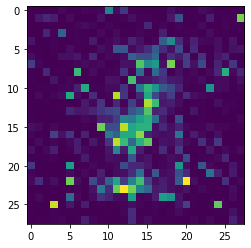

Epoch: 111	Loss:	disc total: 3.547e-01	gen: 3.703e+00	disc real: 5.347e-01	disc fake: 1.747e-01
Epoch: 112	Loss:	disc total: 1.797e-01	gen: 3.285e+00	disc real: 1.542e-01	disc fake: 2.051e-01
Epoch: 113	Loss:	disc total: 7.672e-01	gen: 2.074e+00	disc real: 1.393e+00	disc fake: 1.409e-01
Epoch: 114	Loss:	disc total: 1.532e-01	gen: 2.522e+00	disc real: 1.449e-01	disc fake: 1.615e-01
Epoch: 115	Loss:	disc total: 3.216e-01	gen: 3.065e+00	disc real: 2.228e-01	disc fake: 4.204e-01
Epoch: 116	Loss:	disc total: 1.578e-01	gen: 3.341e+00	disc real: 2.167e-01	disc fake: 9.888e-02
Epoch: 117	Loss:	disc total: 6.924e-01	gen: 3.346e+00	disc real: 1.334e+00	disc fake: 5.116e-02
Epoch: 118	Loss:	disc total: 1.993e-01	gen: 3.195e+00	disc real: 1.665e-01	disc fake: 2.321e-01
Epoch: 119	Loss:	disc total: 3.888e-01	gen: 3.907e+00	disc real: 4.145e-01	disc fake: 3.631e-01
Epoch: 120	Loss:	disc total: 1.947e-01	gen: 3.346e+00	disc real: 2.195e-01	disc fake: 1.699e-01


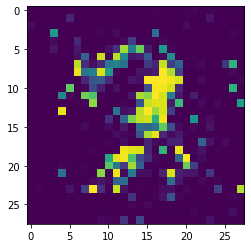

Epoch: 121	Loss:	disc total: 8.152e-02	gen: 3.038e+00	disc real: 1.167e-01	disc fake: 4.633e-02
Epoch: 122	Loss:	disc total: 2.884e-01	gen: 3.623e+00	disc real: 3.754e-01	disc fake: 2.014e-01
Epoch: 123	Loss:	disc total: 1.730e-01	gen: 3.435e+00	disc real: 2.528e-01	disc fake: 9.324e-02
Epoch: 124	Loss:	disc total: 1.520e-01	gen: 2.708e+00	disc real: 4.501e-02	disc fake: 2.589e-01
Epoch: 125	Loss:	disc total: 2.672e-01	gen: 2.379e+00	disc real: 4.271e-01	disc fake: 1.073e-01
Epoch: 126	Loss:	disc total: 2.652e-01	gen: 9.991e-01	disc real: 1.523e-01	disc fake: 3.782e-01
Epoch: 127	Loss:	disc total: 3.242e-01	gen: 1.893e+00	disc real: 3.685e-01	disc fake: 2.800e-01
Epoch: 128	Loss:	disc total: 6.113e-02	gen: 3.877e+00	disc real: 3.711e-02	disc fake: 8.515e-02
Epoch: 129	Loss:	disc total: 9.795e-02	gen: 2.945e+00	disc real: 1.096e-01	disc fake: 8.630e-02
Epoch: 130	Loss:	disc total: 7.060e-01	gen: 2.311e+00	disc real: 9.506e-01	disc fake: 4.615e-01


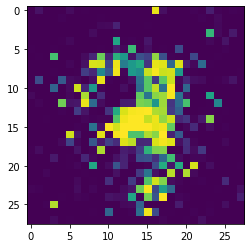

Epoch: 131	Loss:	disc total: 2.930e-01	gen: 1.949e+00	disc real: 1.989e-01	disc fake: 3.871e-01
Epoch: 132	Loss:	disc total: 2.054e-01	gen: 1.869e+00	disc real: 2.924e-02	disc fake: 3.816e-01
Epoch: 133	Loss:	disc total: 2.647e-01	gen: 2.757e+00	disc real: 1.675e-01	disc fake: 3.619e-01
Epoch: 134	Loss:	disc total: 2.024e-01	gen: 2.940e+00	disc real: 6.434e-02	disc fake: 3.404e-01
Epoch: 135	Loss:	disc total: 2.430e-01	gen: 3.642e+00	disc real: 3.393e-01	disc fake: 1.468e-01
Epoch: 136	Loss:	disc total: 1.229e-01	gen: 5.354e+00	disc real: 1.790e-01	disc fake: 6.673e-02
Epoch: 137	Loss:	disc total: 4.313e-01	gen: 4.426e+00	disc real: 6.290e-01	disc fake: 2.336e-01
Epoch: 138	Loss:	disc total: 3.886e-01	gen: 4.459e+00	disc real: 7.152e-01	disc fake: 6.207e-02
Epoch: 139	Loss:	disc total: 1.007e-01	gen: 3.473e+00	disc real: 1.231e-02	disc fake: 1.890e-01
Epoch: 140	Loss:	disc total: 1.800e-01	gen: 2.729e+00	disc real: 8.173e-02	disc fake: 2.783e-01


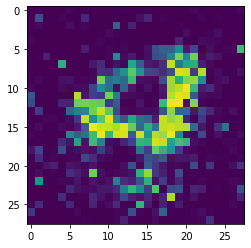

Epoch: 141	Loss:	disc total: 1.179e-01	gen: 3.331e+00	disc real: 6.981e-02	disc fake: 1.661e-01
Epoch: 142	Loss:	disc total: 3.620e-01	gen: 2.981e+00	disc real: 2.920e-01	disc fake: 4.321e-01
Epoch: 143	Loss:	disc total: 2.756e-01	gen: 1.949e+00	disc real: 2.545e-01	disc fake: 2.967e-01
Epoch: 144	Loss:	disc total: 5.838e-01	gen: 3.043e+00	disc real: 8.990e-01	disc fake: 2.687e-01
Epoch: 145	Loss:	disc total: 1.587e-01	gen: 2.552e+00	disc real: 4.032e-02	disc fake: 2.770e-01
Epoch: 146	Loss:	disc total: 1.931e-01	gen: 2.663e+00	disc real: 3.073e-02	disc fake: 3.555e-01
Epoch: 147	Loss:	disc total: 2.723e-01	gen: 2.726e+00	disc real: 2.173e-01	disc fake: 3.273e-01
Epoch: 148	Loss:	disc total: 1.125e-01	gen: 3.366e+00	disc real: 1.046e-01	disc fake: 1.204e-01
Epoch: 149	Loss:	disc total: 2.477e-01	gen: 2.276e+00	disc real: 9.973e-02	disc fake: 3.956e-01
Epoch: 150	Loss:	disc total: 1.349e-01	gen: 2.918e+00	disc real: 1.309e-01	disc fake: 1.390e-01


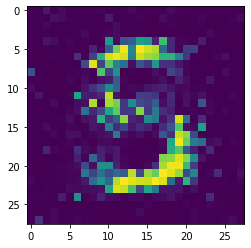

Epoch: 151	Loss:	disc total: 2.722e-01	gen: 2.242e+00	disc real: 2.272e-01	disc fake: 3.173e-01
Epoch: 152	Loss:	disc total: 2.111e-01	gen: 2.621e+00	disc real: 2.026e-01	disc fake: 2.196e-01
Epoch: 153	Loss:	disc total: 2.292e-01	gen: 3.655e+00	disc real: 3.849e-01	disc fake: 7.360e-02
Epoch: 154	Loss:	disc total: 1.842e-01	gen: 2.385e+00	disc real: 8.909e-02	disc fake: 2.792e-01
Epoch: 155	Loss:	disc total: 2.312e-01	gen: 2.311e+00	disc real: 2.602e-01	disc fake: 2.022e-01
Epoch: 156	Loss:	disc total: 1.498e-01	gen: 1.887e+00	disc real: 1.139e-01	disc fake: 1.857e-01
Epoch: 157	Loss:	disc total: 1.879e-01	gen: 1.931e+00	disc real: 3.981e-02	disc fake: 3.359e-01
Epoch: 158	Loss:	disc total: 1.105e-01	gen: 2.449e+00	disc real: 2.638e-02	disc fake: 1.947e-01
Epoch: 159	Loss:	disc total: 1.677e-01	gen: 1.616e+00	disc real: 4.077e-02	disc fake: 2.946e-01
Epoch: 160	Loss:	disc total: 2.407e-01	gen: 2.251e+00	disc real: 1.573e-01	disc fake: 3.240e-01


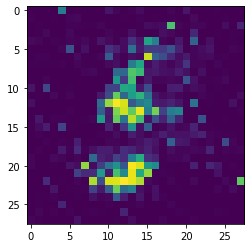

Epoch: 161	Loss:	disc total: 1.785e-01	gen: 1.186e+00	disc real: 2.214e-02	disc fake: 3.348e-01
Epoch: 162	Loss:	disc total: 1.672e-01	gen: 2.359e+00	disc real: 3.671e-02	disc fake: 2.977e-01
Epoch: 163	Loss:	disc total: 2.666e-01	gen: 1.714e+00	disc real: 9.817e-02	disc fake: 4.349e-01
Epoch: 164	Loss:	disc total: 1.717e-01	gen: 2.595e+00	disc real: 2.601e-01	disc fake: 8.333e-02
Epoch: 165	Loss:	disc total: 1.896e-01	gen: 2.929e+00	disc real: 3.385e-02	disc fake: 3.453e-01
Epoch: 166	Loss:	disc total: 3.032e-01	gen: 2.108e+00	disc real: 2.324e-01	disc fake: 3.740e-01
Epoch: 167	Loss:	disc total: 1.784e-01	gen: 3.754e+00	disc real: 2.961e-01	disc fake: 6.073e-02
Epoch: 168	Loss:	disc total: 2.201e-01	gen: 2.209e+00	disc real: 6.276e-02	disc fake: 3.774e-01
Epoch: 169	Loss:	disc total: 2.126e-01	gen: 2.256e+00	disc real: 1.424e-01	disc fake: 2.828e-01
Epoch: 170	Loss:	disc total: 1.704e-01	gen: 2.616e+00	disc real: 6.000e-02	disc fake: 2.807e-01


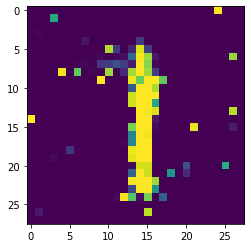

Epoch: 171	Loss:	disc total: 2.514e-01	gen: 3.089e+00	disc real: 9.586e-02	disc fake: 4.069e-01
Epoch: 172	Loss:	disc total: 1.809e-01	gen: 2.557e+00	disc real: 2.010e-01	disc fake: 1.608e-01
Epoch: 173	Loss:	disc total: 5.543e-01	gen: 3.178e+00	disc real: 9.641e-01	disc fake: 1.445e-01
Epoch: 174	Loss:	disc total: 2.752e-01	gen: 2.232e+00	disc real: 1.246e-01	disc fake: 4.257e-01
Epoch: 175	Loss:	disc total: 3.041e-01	gen: 1.832e+00	disc real: 3.768e-01	disc fake: 2.314e-01
Epoch: 176	Loss:	disc total: 3.456e-01	gen: 2.354e+00	disc real: 5.706e-01	disc fake: 1.205e-01
Epoch: 177	Loss:	disc total: 2.625e-01	gen: 1.211e+00	disc real: 1.381e-01	disc fake: 3.869e-01
Epoch: 178	Loss:	disc total: 2.318e-01	gen: 2.376e+00	disc real: 3.018e-01	disc fake: 1.618e-01
Epoch: 179	Loss:	disc total: 2.628e-01	gen: 1.827e+00	disc real: 2.848e-01	disc fake: 2.408e-01
Epoch: 180	Loss:	disc total: 4.416e-01	gen: 1.742e+00	disc real: 7.055e-01	disc fake: 1.778e-01


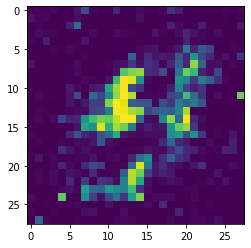

Epoch: 181	Loss:	disc total: 4.168e-01	gen: 2.549e+00	disc real: 5.729e-01	disc fake: 2.608e-01
Epoch: 182	Loss:	disc total: 2.092e-01	gen: 2.280e+00	disc real: 8.789e-02	disc fake: 3.305e-01
Epoch: 183	Loss:	disc total: 4.114e-01	gen: 1.926e+00	disc real: 2.155e-01	disc fake: 6.073e-01
Epoch: 184	Loss:	disc total: 2.890e-01	gen: 1.467e+00	disc real: 1.670e-01	disc fake: 4.110e-01
Epoch: 185	Loss:	disc total: 2.262e-01	gen: 1.812e+00	disc real: 2.326e-01	disc fake: 2.197e-01
Epoch: 186	Loss:	disc total: 2.553e-01	gen: 2.199e+00	disc real: 2.554e-01	disc fake: 2.551e-01
Epoch: 187	Loss:	disc total: 2.950e-01	gen: 2.473e+00	disc real: 3.906e-01	disc fake: 1.994e-01
Epoch: 188	Loss:	disc total: 3.239e-01	gen: 2.038e+00	disc real: 4.854e-01	disc fake: 1.624e-01
Epoch: 189	Loss:	disc total: 3.932e-01	gen: 2.212e+00	disc real: 5.392e-01	disc fake: 2.471e-01
Epoch: 190	Loss:	disc total: 4.126e-01	gen: 2.098e+00	disc real: 5.457e-01	disc fake: 2.795e-01


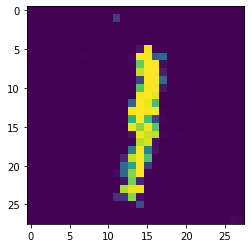

Epoch: 191	Loss:	disc total: 4.691e-01	gen: 2.638e+00	disc real: 6.045e-01	disc fake: 3.336e-01
Epoch: 192	Loss:	disc total: 4.106e-01	gen: 1.993e+00	disc real: 5.732e-01	disc fake: 2.480e-01
Epoch: 193	Loss:	disc total: 3.364e-01	gen: 3.035e+00	disc real: 4.371e-01	disc fake: 2.358e-01
Epoch: 194	Loss:	disc total: 4.747e-01	gen: 3.418e+00	disc real: 6.818e-01	disc fake: 2.675e-01
Epoch: 195	Loss:	disc total: 2.843e-01	gen: 2.522e+00	disc real: 3.903e-01	disc fake: 1.783e-01
Epoch: 196	Loss:	disc total: 5.685e-01	gen: 2.853e+00	disc real: 5.846e-01	disc fake: 5.524e-01
Epoch: 197	Loss:	disc total: 3.659e-01	gen: 2.332e+00	disc real: 5.053e-01	disc fake: 2.265e-01
Epoch: 198	Loss:	disc total: 4.988e-01	gen: 2.221e+00	disc real: 7.908e-01	disc fake: 2.068e-01
Epoch: 199	Loss:	disc total: 5.677e-01	gen: 2.777e+00	disc real: 8.635e-01	disc fake: 2.719e-01
Epoch: 200	Loss:	disc total: 3.989e-01	gen: 2.388e+00	disc real: 5.474e-01	disc fake: 2.504e-01


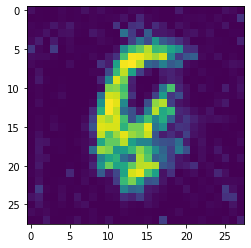

Epoch: 201	Loss:	disc total: 2.662e-01	gen: 2.616e+00	disc real: 3.842e-01	disc fake: 1.483e-01
Epoch: 202	Loss:	disc total: 3.806e-01	gen: 2.728e+00	disc real: 5.790e-01	disc fake: 1.822e-01
Epoch: 203	Loss:	disc total: 4.081e-01	gen: 2.123e+00	disc real: 5.404e-01	disc fake: 2.758e-01
Epoch: 204	Loss:	disc total: 4.056e-01	gen: 1.924e+00	disc real: 6.087e-01	disc fake: 2.025e-01
Epoch: 205	Loss:	disc total: 4.550e-01	gen: 2.469e+00	disc real: 6.576e-01	disc fake: 2.523e-01
Epoch: 206	Loss:	disc total: 3.539e-01	gen: 1.992e+00	disc real: 2.990e-01	disc fake: 4.087e-01
Epoch: 207	Loss:	disc total: 5.523e-01	gen: 2.141e+00	disc real: 7.907e-01	disc fake: 3.140e-01
Epoch: 208	Loss:	disc total: 4.484e-01	gen: 2.059e+00	disc real: 7.692e-01	disc fake: 1.276e-01
Epoch: 209	Loss:	disc total: 3.321e-01	gen: 2.386e+00	disc real: 4.934e-01	disc fake: 1.708e-01
Epoch: 210	Loss:	disc total: 4.517e-01	gen: 2.333e+00	disc real: 6.409e-01	disc fake: 2.625e-01


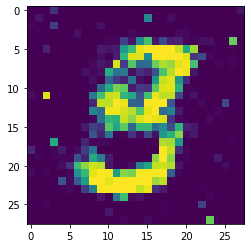

Epoch: 211	Loss:	disc total: 4.676e-01	gen: 2.246e+00	disc real: 5.656e-01	disc fake: 3.697e-01
Epoch: 212	Loss:	disc total: 3.800e-01	gen: 1.911e+00	disc real: 4.069e-01	disc fake: 3.530e-01
Epoch: 213	Loss:	disc total: 4.271e-01	gen: 2.758e+00	disc real: 6.014e-01	disc fake: 2.527e-01
Epoch: 214	Loss:	disc total: 4.108e-01	gen: 2.434e+00	disc real: 5.123e-01	disc fake: 3.093e-01
Epoch: 215	Loss:	disc total: 3.488e-01	gen: 2.277e+00	disc real: 5.515e-01	disc fake: 1.461e-01
Epoch: 216	Loss:	disc total: 4.647e-01	gen: 3.009e+00	disc real: 7.484e-01	disc fake: 1.810e-01
Epoch: 217	Loss:	disc total: 4.956e-01	gen: 2.481e+00	disc real: 5.735e-01	disc fake: 4.178e-01
Epoch: 218	Loss:	disc total: 3.642e-01	gen: 2.789e+00	disc real: 3.384e-01	disc fake: 3.900e-01
Epoch: 219	Loss:	disc total: 3.291e-01	gen: 2.063e+00	disc real: 3.219e-01	disc fake: 3.364e-01
Epoch: 220	Loss:	disc total: 4.958e-01	gen: 2.468e+00	disc real: 7.912e-01	disc fake: 2.004e-01


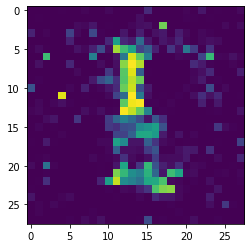

Epoch: 221	Loss:	disc total: 3.775e-01	gen: 2.493e+00	disc real: 5.149e-01	disc fake: 2.401e-01
Epoch: 222	Loss:	disc total: 3.384e-01	gen: 2.486e+00	disc real: 4.458e-01	disc fake: 2.309e-01
Epoch: 223	Loss:	disc total: 4.494e-01	gen: 2.698e+00	disc real: 5.515e-01	disc fake: 3.472e-01
Epoch: 224	Loss:	disc total: 2.636e-01	gen: 1.892e+00	disc real: 1.878e-01	disc fake: 3.394e-01
Epoch: 225	Loss:	disc total: 4.180e-01	gen: 3.080e+00	disc real: 4.160e-01	disc fake: 4.199e-01
Epoch: 226	Loss:	disc total: 3.461e-01	gen: 2.045e+00	disc real: 1.954e-01	disc fake: 4.967e-01
Epoch: 227	Loss:	disc total: 1.704e-01	gen: 2.652e+00	disc real: 1.239e-01	disc fake: 2.169e-01
Epoch: 228	Loss:	disc total: 3.656e-01	gen: 2.632e+00	disc real: 4.940e-01	disc fake: 2.371e-01
Epoch: 229	Loss:	disc total: 2.853e-01	gen: 2.567e+00	disc real: 2.191e-01	disc fake: 3.514e-01
Epoch: 230	Loss:	disc total: 3.410e-01	gen: 2.070e+00	disc real: 4.446e-01	disc fake: 2.374e-01


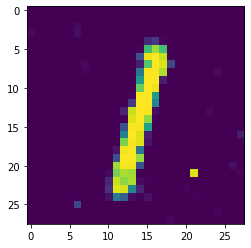

Epoch: 231	Loss:	disc total: 4.902e-01	gen: 1.915e+00	disc real: 3.810e-01	disc fake: 5.995e-01
Epoch: 232	Loss:	disc total: 3.602e-01	gen: 3.152e+00	disc real: 5.339e-01	disc fake: 1.864e-01
Epoch: 233	Loss:	disc total: 3.715e-01	gen: 2.447e+00	disc real: 3.171e-01	disc fake: 4.258e-01
Epoch: 234	Loss:	disc total: 3.853e-01	gen: 2.645e+00	disc real: 4.155e-01	disc fake: 3.550e-01
Epoch: 235	Loss:	disc total: 2.977e-01	gen: 2.114e+00	disc real: 2.099e-01	disc fake: 3.855e-01
Epoch: 236	Loss:	disc total: 3.759e-01	gen: 2.336e+00	disc real: 4.483e-01	disc fake: 3.036e-01
Epoch: 237	Loss:	disc total: 3.206e-01	gen: 2.151e+00	disc real: 4.341e-01	disc fake: 2.071e-01
Epoch: 238	Loss:	disc total: 5.451e-01	gen: 1.944e+00	disc real: 5.456e-01	disc fake: 5.447e-01
Epoch: 239	Loss:	disc total: 4.505e-01	gen: 2.315e+00	disc real: 6.025e-01	disc fake: 2.985e-01
Epoch: 240	Loss:	disc total: 3.474e-01	gen: 1.964e+00	disc real: 4.199e-01	disc fake: 2.748e-01


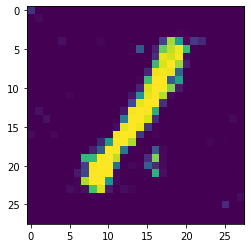

Epoch: 241	Loss:	disc total: 4.776e-01	gen: 2.083e+00	disc real: 4.607e-01	disc fake: 4.945e-01
Epoch: 242	Loss:	disc total: 2.671e-01	gen: 2.178e+00	disc real: 3.170e-01	disc fake: 2.172e-01
Epoch: 243	Loss:	disc total: 3.623e-01	gen: 2.146e+00	disc real: 2.183e-01	disc fake: 5.063e-01
Epoch: 244	Loss:	disc total: 3.599e-01	gen: 2.518e+00	disc real: 3.552e-01	disc fake: 3.646e-01
Epoch: 245	Loss:	disc total: 3.259e-01	gen: 1.834e+00	disc real: 2.762e-01	disc fake: 3.755e-01
Epoch: 246	Loss:	disc total: 3.726e-01	gen: 1.863e+00	disc real: 1.497e-01	disc fake: 5.956e-01
Epoch: 247	Loss:	disc total: 3.618e-01	gen: 2.364e+00	disc real: 3.817e-01	disc fake: 3.418e-01
Epoch: 248	Loss:	disc total: 2.364e-01	gen: 1.859e+00	disc real: 1.797e-01	disc fake: 2.931e-01
Epoch: 249	Loss:	disc total: 3.683e-01	gen: 1.618e+00	disc real: 3.881e-01	disc fake: 3.485e-01
Epoch: 250	Loss:	disc total: 2.304e-01	gen: 1.562e+00	disc real: 9.150e-02	disc fake: 3.694e-01


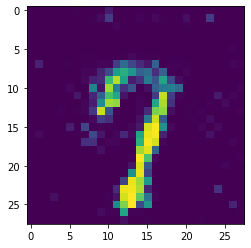

Epoch: 251	Loss:	disc total: 2.959e-01	gen: 2.438e+00	disc real: 3.928e-01	disc fake: 1.990e-01
Epoch: 252	Loss:	disc total: 3.533e-01	gen: 1.950e+00	disc real: 4.265e-01	disc fake: 2.800e-01
Epoch: 253	Loss:	disc total: 3.807e-01	gen: 2.163e+00	disc real: 2.779e-01	disc fake: 4.834e-01
Epoch: 254	Loss:	disc total: 3.190e-01	gen: 2.444e+00	disc real: 3.499e-01	disc fake: 2.881e-01
Epoch: 255	Loss:	disc total: 3.199e-01	gen: 2.171e+00	disc real: 4.216e-01	disc fake: 2.182e-01
Epoch: 256	Loss:	disc total: 3.541e-01	gen: 2.766e+00	disc real: 4.020e-01	disc fake: 3.062e-01
Epoch: 257	Loss:	disc total: 2.536e-01	gen: 2.594e+00	disc real: 3.249e-01	disc fake: 1.824e-01
Epoch: 258	Loss:	disc total: 3.282e-01	gen: 2.240e+00	disc real: 3.046e-01	disc fake: 3.518e-01
Epoch: 259	Loss:	disc total: 3.184e-01	gen: 3.214e+00	disc real: 4.109e-01	disc fake: 2.259e-01
Epoch: 260	Loss:	disc total: 3.662e-01	gen: 2.398e+00	disc real: 4.395e-01	disc fake: 2.928e-01


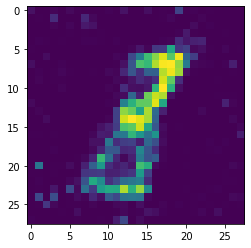

Epoch: 261	Loss:	disc total: 2.721e-01	gen: 2.473e+00	disc real: 1.982e-01	disc fake: 3.459e-01
Epoch: 262	Loss:	disc total: 2.551e-01	gen: 2.219e+00	disc real: 1.293e-01	disc fake: 3.808e-01
Epoch: 263	Loss:	disc total: 3.501e-01	gen: 2.407e+00	disc real: 1.929e-01	disc fake: 5.074e-01
Epoch: 264	Loss:	disc total: 2.544e-01	gen: 2.256e+00	disc real: 2.318e-01	disc fake: 2.770e-01
Epoch: 265	Loss:	disc total: 2.809e-01	gen: 1.894e+00	disc real: 1.969e-01	disc fake: 3.649e-01
Epoch: 266	Loss:	disc total: 2.368e-01	gen: 1.737e+00	disc real: 2.496e-01	disc fake: 2.241e-01
Epoch: 267	Loss:	disc total: 3.681e-01	gen: 2.282e+00	disc real: 3.163e-01	disc fake: 4.199e-01
Epoch: 268	Loss:	disc total: 2.447e-01	gen: 2.326e+00	disc real: 1.450e-01	disc fake: 3.444e-01
Epoch: 269	Loss:	disc total: 3.227e-01	gen: 1.836e+00	disc real: 2.730e-01	disc fake: 3.724e-01
Epoch: 270	Loss:	disc total: 3.047e-01	gen: 2.122e+00	disc real: 4.027e-01	disc fake: 2.067e-01


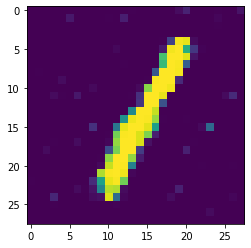

Epoch: 271	Loss:	disc total: 3.380e-01	gen: 2.457e+00	disc real: 3.075e-01	disc fake: 3.685e-01
Epoch: 272	Loss:	disc total: 2.512e-01	gen: 2.376e+00	disc real: 2.482e-01	disc fake: 2.542e-01
Epoch: 273	Loss:	disc total: 3.436e-01	gen: 2.352e+00	disc real: 3.437e-01	disc fake: 3.435e-01
Epoch: 274	Loss:	disc total: 2.218e-01	gen: 1.806e+00	disc real: 1.774e-01	disc fake: 2.662e-01
Epoch: 275	Loss:	disc total: 3.281e-01	gen: 2.086e+00	disc real: 3.202e-01	disc fake: 3.360e-01
Epoch: 276	Loss:	disc total: 3.493e-01	gen: 2.806e+00	disc real: 4.478e-01	disc fake: 2.508e-01
Epoch: 277	Loss:	disc total: 2.658e-01	gen: 2.454e+00	disc real: 3.127e-01	disc fake: 2.189e-01
Epoch: 278	Loss:	disc total: 2.250e-01	gen: 2.805e+00	disc real: 3.233e-01	disc fake: 1.267e-01
Epoch: 279	Loss:	disc total: 3.374e-01	gen: 2.032e+00	disc real: 2.434e-01	disc fake: 4.313e-01
Epoch: 280	Loss:	disc total: 3.210e-01	gen: 2.731e+00	disc real: 3.247e-01	disc fake: 3.173e-01


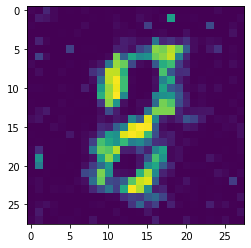

Epoch: 281	Loss:	disc total: 3.246e-01	gen: 1.837e+00	disc real: 3.539e-01	disc fake: 2.953e-01
Epoch: 282	Loss:	disc total: 2.558e-01	gen: 2.912e+00	disc real: 3.536e-01	disc fake: 1.580e-01
Epoch: 283	Loss:	disc total: 1.925e-01	gen: 3.153e+00	disc real: 2.576e-01	disc fake: 1.273e-01
Epoch: 284	Loss:	disc total: 2.364e-01	gen: 2.554e+00	disc real: 2.845e-01	disc fake: 1.882e-01
Epoch: 285	Loss:	disc total: 3.326e-01	gen: 2.113e+00	disc real: 2.611e-01	disc fake: 4.042e-01
Epoch: 286	Loss:	disc total: 3.449e-01	gen: 2.038e+00	disc real: 4.054e-01	disc fake: 2.845e-01
Epoch: 287	Loss:	disc total: 3.739e-01	gen: 2.870e+00	disc real: 3.810e-01	disc fake: 3.668e-01
Epoch: 288	Loss:	disc total: 3.525e-01	gen: 2.804e+00	disc real: 3.161e-01	disc fake: 3.888e-01
Epoch: 289	Loss:	disc total: 3.720e-01	gen: 2.200e+00	disc real: 4.756e-01	disc fake: 2.684e-01
Epoch: 290	Loss:	disc total: 3.529e-01	gen: 2.023e+00	disc real: 3.133e-01	disc fake: 3.925e-01


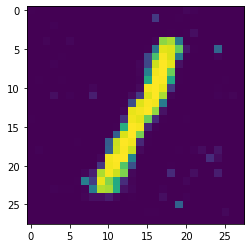

Epoch: 291	Loss:	disc total: 2.127e-01	gen: 2.638e+00	disc real: 3.115e-01	disc fake: 1.138e-01
Epoch: 292	Loss:	disc total: 3.311e-01	gen: 2.127e+00	disc real: 3.451e-01	disc fake: 3.172e-01
Epoch: 293	Loss:	disc total: 2.369e-01	gen: 1.635e+00	disc real: 2.615e-01	disc fake: 2.123e-01
Epoch: 294	Loss:	disc total: 2.705e-01	gen: 2.431e+00	disc real: 1.806e-01	disc fake: 3.605e-01
Epoch: 295	Loss:	disc total: 3.289e-01	gen: 2.246e+00	disc real: 3.730e-01	disc fake: 2.849e-01
Epoch: 296	Loss:	disc total: 2.685e-01	gen: 2.202e+00	disc real: 2.513e-01	disc fake: 2.857e-01
Epoch: 297	Loss:	disc total: 2.318e-01	gen: 2.303e+00	disc real: 3.571e-01	disc fake: 1.066e-01
Epoch: 298	Loss:	disc total: 2.381e-01	gen: 2.102e+00	disc real: 3.326e-01	disc fake: 1.436e-01
Epoch: 299	Loss:	disc total: 3.134e-01	gen: 2.688e+00	disc real: 3.614e-01	disc fake: 2.653e-01
Epoch: 300	Loss:	disc total: 3.482e-01	gen: 2.793e+00	disc real: 3.580e-01	disc fake: 3.385e-01


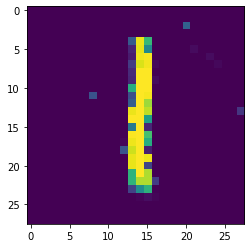

Epoch: 301	Loss:	disc total: 3.030e-01	gen: 1.823e+00	disc real: 1.946e-01	disc fake: 4.113e-01
Epoch: 302	Loss:	disc total: 2.916e-01	gen: 2.437e+00	disc real: 2.239e-01	disc fake: 3.594e-01
Epoch: 303	Loss:	disc total: 2.499e-01	gen: 2.431e+00	disc real: 1.362e-01	disc fake: 3.636e-01
Epoch: 304	Loss:	disc total: 3.405e-01	gen: 3.151e+00	disc real: 3.754e-01	disc fake: 3.056e-01
Epoch: 305	Loss:	disc total: 2.777e-01	gen: 2.010e+00	disc real: 3.789e-01	disc fake: 1.766e-01
Epoch: 306	Loss:	disc total: 2.538e-01	gen: 2.011e+00	disc real: 2.016e-01	disc fake: 3.060e-01
Epoch: 307	Loss:	disc total: 3.183e-01	gen: 1.930e+00	disc real: 2.269e-01	disc fake: 4.097e-01
Epoch: 308	Loss:	disc total: 3.072e-01	gen: 2.752e+00	disc real: 3.611e-01	disc fake: 2.534e-01
Epoch: 309	Loss:	disc total: 3.066e-01	gen: 2.382e+00	disc real: 4.576e-01	disc fake: 1.555e-01
Epoch: 310	Loss:	disc total: 3.629e-01	gen: 2.414e+00	disc real: 3.127e-01	disc fake: 4.130e-01


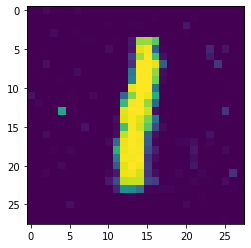

Epoch: 311	Loss:	disc total: 3.234e-01	gen: 2.653e+00	disc real: 5.041e-01	disc fake: 1.427e-01
Epoch: 312	Loss:	disc total: 3.514e-01	gen: 2.719e+00	disc real: 4.448e-01	disc fake: 2.580e-01
Epoch: 313	Loss:	disc total: 3.191e-01	gen: 2.116e+00	disc real: 3.426e-01	disc fake: 2.956e-01
Epoch: 314	Loss:	disc total: 2.737e-01	gen: 1.640e+00	disc real: 2.299e-01	disc fake: 3.175e-01
Epoch: 315	Loss:	disc total: 3.547e-01	gen: 1.873e+00	disc real: 3.766e-01	disc fake: 3.328e-01
Epoch: 316	Loss:	disc total: 3.291e-01	gen: 2.577e+00	disc real: 4.507e-01	disc fake: 2.075e-01
Epoch: 317	Loss:	disc total: 4.173e-01	gen: 2.448e+00	disc real: 4.349e-01	disc fake: 3.998e-01
Epoch: 318	Loss:	disc total: 3.547e-01	gen: 3.059e+00	disc real: 5.385e-01	disc fake: 1.710e-01
Epoch: 319	Loss:	disc total: 2.963e-01	gen: 3.173e+00	disc real: 4.166e-01	disc fake: 1.761e-01
Epoch: 320	Loss:	disc total: 3.436e-01	gen: 2.716e+00	disc real: 2.774e-01	disc fake: 4.098e-01


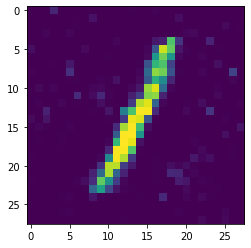

Epoch: 321	Loss:	disc total: 3.363e-01	gen: 1.876e+00	disc real: 2.395e-01	disc fake: 4.331e-01
Epoch: 322	Loss:	disc total: 2.620e-01	gen: 2.477e+00	disc real: 2.424e-01	disc fake: 2.817e-01
Epoch: 323	Loss:	disc total: 3.598e-01	gen: 2.220e+00	disc real: 3.375e-01	disc fake: 3.820e-01
Epoch: 324	Loss:	disc total: 2.778e-01	gen: 2.833e+00	disc real: 3.621e-01	disc fake: 1.935e-01
Epoch: 325	Loss:	disc total: 3.580e-01	gen: 1.715e+00	disc real: 2.390e-01	disc fake: 4.770e-01
Epoch: 326	Loss:	disc total: 3.306e-01	gen: 2.178e+00	disc real: 3.166e-01	disc fake: 3.445e-01
Epoch: 327	Loss:	disc total: 3.149e-01	gen: 2.885e+00	disc real: 3.603e-01	disc fake: 2.696e-01
Epoch: 328	Loss:	disc total: 2.707e-01	gen: 2.635e+00	disc real: 3.400e-01	disc fake: 2.014e-01
Epoch: 329	Loss:	disc total: 3.213e-01	gen: 2.311e+00	disc real: 3.123e-01	disc fake: 3.303e-01
Epoch: 330	Loss:	disc total: 2.291e-01	gen: 2.764e+00	disc real: 2.085e-01	disc fake: 2.496e-01


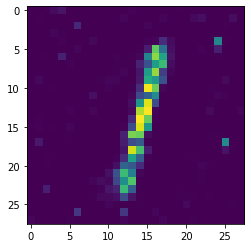

Epoch: 331	Loss:	disc total: 2.073e-01	gen: 2.354e+00	disc real: 1.795e-01	disc fake: 2.350e-01
Epoch: 332	Loss:	disc total: 2.650e-01	gen: 2.171e+00	disc real: 3.513e-01	disc fake: 1.788e-01
Epoch: 333	Loss:	disc total: 2.617e-01	gen: 2.482e+00	disc real: 2.467e-01	disc fake: 2.767e-01
Epoch: 334	Loss:	disc total: 2.459e-01	gen: 2.950e+00	disc real: 4.199e-01	disc fake: 7.189e-02
Epoch: 335	Loss:	disc total: 2.411e-01	gen: 2.420e+00	disc real: 1.995e-01	disc fake: 2.827e-01
Epoch: 336	Loss:	disc total: 2.887e-01	gen: 2.439e+00	disc real: 3.066e-01	disc fake: 2.707e-01
Epoch: 337	Loss:	disc total: 2.941e-01	gen: 2.745e+00	disc real: 3.052e-01	disc fake: 2.829e-01
Epoch: 338	Loss:	disc total: 2.465e-01	gen: 2.162e+00	disc real: 3.752e-01	disc fake: 1.178e-01
Epoch: 339	Loss:	disc total: 2.559e-01	gen: 2.603e+00	disc real: 3.431e-01	disc fake: 1.687e-01
Epoch: 340	Loss:	disc total: 3.245e-01	gen: 2.933e+00	disc real: 4.727e-01	disc fake: 1.763e-01


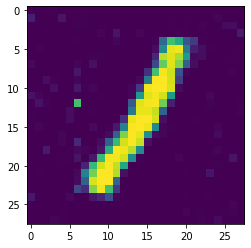

Epoch: 341	Loss:	disc total: 2.457e-01	gen: 3.543e+00	disc real: 3.633e-01	disc fake: 1.281e-01
Epoch: 342	Loss:	disc total: 2.342e-01	gen: 2.365e+00	disc real: 2.882e-01	disc fake: 1.803e-01
Epoch: 343	Loss:	disc total: 2.960e-01	gen: 2.159e+00	disc real: 2.776e-01	disc fake: 3.144e-01
Epoch: 344	Loss:	disc total: 3.765e-01	gen: 2.453e+00	disc real: 1.997e-01	disc fake: 5.534e-01
Epoch: 345	Loss:	disc total: 2.651e-01	gen: 2.780e+00	disc real: 3.170e-01	disc fake: 2.132e-01
Epoch: 346	Loss:	disc total: 2.904e-01	gen: 2.810e+00	disc real: 2.590e-01	disc fake: 3.218e-01
Epoch: 347	Loss:	disc total: 2.536e-01	gen: 2.850e+00	disc real: 2.951e-01	disc fake: 2.122e-01
Epoch: 348	Loss:	disc total: 2.419e-01	gen: 2.146e+00	disc real: 2.775e-01	disc fake: 2.063e-01
Epoch: 349	Loss:	disc total: 2.683e-01	gen: 2.363e+00	disc real: 1.796e-01	disc fake: 3.570e-01
Epoch: 350	Loss:	disc total: 3.111e-01	gen: 2.355e+00	disc real: 3.897e-01	disc fake: 2.324e-01


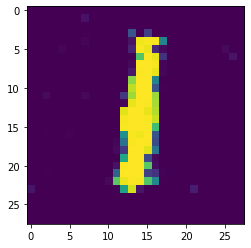

Epoch: 351	Loss:	disc total: 2.494e-01	gen: 2.113e+00	disc real: 2.701e-01	disc fake: 2.287e-01
Epoch: 352	Loss:	disc total: 2.309e-01	gen: 2.469e+00	disc real: 3.044e-01	disc fake: 1.573e-01
Epoch: 353	Loss:	disc total: 2.127e-01	gen: 1.808e+00	disc real: 2.357e-01	disc fake: 1.897e-01
Epoch: 354	Loss:	disc total: 2.776e-01	gen: 2.521e+00	disc real: 2.421e-01	disc fake: 3.130e-01
Epoch: 355	Loss:	disc total: 2.214e-01	gen: 2.572e+00	disc real: 2.480e-01	disc fake: 1.948e-01
Epoch: 356	Loss:	disc total: 4.174e-01	gen: 2.293e+00	disc real: 2.379e-01	disc fake: 5.969e-01
Epoch: 357	Loss:	disc total: 2.750e-01	gen: 2.381e+00	disc real: 2.889e-01	disc fake: 2.612e-01
Epoch: 358	Loss:	disc total: 3.799e-01	gen: 2.987e+00	disc real: 4.941e-01	disc fake: 2.657e-01
Epoch: 359	Loss:	disc total: 1.760e-01	gen: 2.714e+00	disc real: 2.361e-01	disc fake: 1.158e-01
Epoch: 360	Loss:	disc total: 2.048e-01	gen: 2.501e+00	disc real: 2.343e-01	disc fake: 1.753e-01


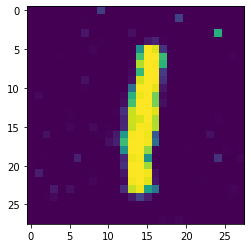

Epoch: 361	Loss:	disc total: 1.561e-01	gen: 2.953e+00	disc real: 1.306e-01	disc fake: 1.817e-01
Epoch: 362	Loss:	disc total: 2.313e-01	gen: 2.416e+00	disc real: 2.527e-01	disc fake: 2.098e-01
Epoch: 363	Loss:	disc total: 1.955e-01	gen: 2.506e+00	disc real: 3.042e-01	disc fake: 8.687e-02
Epoch: 364	Loss:	disc total: 1.872e-01	gen: 2.405e+00	disc real: 2.778e-01	disc fake: 9.665e-02
Epoch: 365	Loss:	disc total: 2.253e-01	gen: 2.559e+00	disc real: 3.784e-01	disc fake: 7.216e-02
Epoch: 366	Loss:	disc total: 3.380e-01	gen: 3.038e+00	disc real: 2.428e-01	disc fake: 4.332e-01
Epoch: 367	Loss:	disc total: 2.777e-01	gen: 2.558e+00	disc real: 2.698e-01	disc fake: 2.856e-01
Epoch: 368	Loss:	disc total: 2.158e-01	gen: 2.550e+00	disc real: 2.049e-01	disc fake: 2.266e-01
Epoch: 369	Loss:	disc total: 2.508e-01	gen: 2.693e+00	disc real: 3.132e-01	disc fake: 1.883e-01
Epoch: 370	Loss:	disc total: 3.452e-01	gen: 2.508e+00	disc real: 3.119e-01	disc fake: 3.785e-01


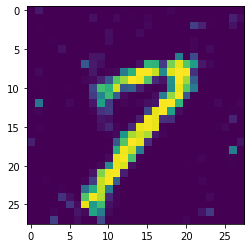

Epoch: 371	Loss:	disc total: 2.522e-01	gen: 2.845e+00	disc real: 2.917e-01	disc fake: 2.128e-01
Epoch: 372	Loss:	disc total: 2.335e-01	gen: 2.286e+00	disc real: 3.432e-01	disc fake: 1.239e-01
Epoch: 373	Loss:	disc total: 2.471e-01	gen: 2.355e+00	disc real: 2.997e-01	disc fake: 1.944e-01
Epoch: 374	Loss:	disc total: 2.247e-01	gen: 2.231e+00	disc real: 2.302e-01	disc fake: 2.192e-01
Epoch: 375	Loss:	disc total: 2.597e-01	gen: 2.845e+00	disc real: 3.176e-01	disc fake: 2.017e-01
Epoch: 376	Loss:	disc total: 2.659e-01	gen: 2.646e+00	disc real: 3.820e-01	disc fake: 1.498e-01
Epoch: 377	Loss:	disc total: 2.592e-01	gen: 2.151e+00	disc real: 2.353e-01	disc fake: 2.832e-01
Epoch: 378	Loss:	disc total: 1.494e-01	gen: 2.767e+00	disc real: 1.358e-01	disc fake: 1.630e-01
Epoch: 379	Loss:	disc total: 1.595e-01	gen: 2.460e+00	disc real: 1.232e-01	disc fake: 1.959e-01
Epoch: 380	Loss:	disc total: 1.844e-01	gen: 2.808e+00	disc real: 1.660e-01	disc fake: 2.027e-01


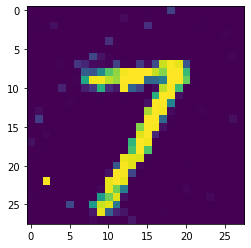

Epoch: 381	Loss:	disc total: 1.828e-01	gen: 2.937e+00	disc real: 2.137e-01	disc fake: 1.518e-01
Epoch: 382	Loss:	disc total: 3.583e-01	gen: 2.744e+00	disc real: 2.889e-01	disc fake: 4.277e-01
Epoch: 383	Loss:	disc total: 1.728e-01	gen: 2.667e+00	disc real: 2.227e-01	disc fake: 1.230e-01
Epoch: 384	Loss:	disc total: 2.401e-01	gen: 2.181e+00	disc real: 2.236e-01	disc fake: 2.565e-01
Epoch: 385	Loss:	disc total: 1.839e-01	gen: 2.184e+00	disc real: 2.619e-01	disc fake: 1.060e-01
Epoch: 386	Loss:	disc total: 2.765e-01	gen: 2.269e+00	disc real: 2.655e-01	disc fake: 2.875e-01
Epoch: 387	Loss:	disc total: 2.843e-01	gen: 2.190e+00	disc real: 2.867e-01	disc fake: 2.819e-01
Epoch: 388	Loss:	disc total: 2.042e-01	gen: 2.558e+00	disc real: 2.099e-01	disc fake: 1.985e-01
Epoch: 389	Loss:	disc total: 2.300e-01	gen: 2.301e+00	disc real: 2.343e-01	disc fake: 2.257e-01
Epoch: 390	Loss:	disc total: 1.699e-01	gen: 2.770e+00	disc real: 2.657e-01	disc fake: 7.415e-02


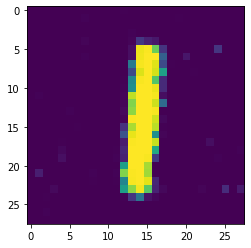

Epoch: 391	Loss:	disc total: 2.741e-01	gen: 2.475e+00	disc real: 2.869e-01	disc fake: 2.613e-01
Epoch: 392	Loss:	disc total: 1.968e-01	gen: 2.855e+00	disc real: 2.544e-01	disc fake: 1.393e-01
Epoch: 393	Loss:	disc total: 3.215e-01	gen: 2.870e+00	disc real: 3.273e-01	disc fake: 3.157e-01
Epoch: 394	Loss:	disc total: 1.920e-01	gen: 2.859e+00	disc real: 2.625e-01	disc fake: 1.214e-01
Epoch: 395	Loss:	disc total: 3.052e-01	gen: 2.832e+00	disc real: 3.580e-01	disc fake: 2.523e-01
Epoch: 396	Loss:	disc total: 1.684e-01	gen: 2.768e+00	disc real: 2.012e-01	disc fake: 1.355e-01
Epoch: 397	Loss:	disc total: 2.352e-01	gen: 2.701e+00	disc real: 2.574e-01	disc fake: 2.131e-01
Epoch: 398	Loss:	disc total: 1.791e-01	gen: 3.231e+00	disc real: 2.732e-01	disc fake: 8.490e-02
Epoch: 399	Loss:	disc total: 2.279e-01	gen: 2.701e+00	disc real: 2.432e-01	disc fake: 2.126e-01
Epoch: 400	Loss:	disc total: 1.550e-01	gen: 2.863e+00	disc real: 1.539e-01	disc fake: 1.562e-01


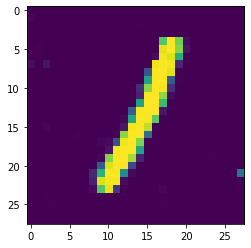

Epoch: 401	Loss:	disc total: 2.161e-01	gen: 2.693e+00	disc real: 2.115e-01	disc fake: 2.206e-01
Epoch: 402	Loss:	disc total: 1.771e-01	gen: 2.944e+00	disc real: 2.152e-01	disc fake: 1.391e-01
Epoch: 403	Loss:	disc total: 2.550e-01	gen: 2.551e+00	disc real: 1.889e-01	disc fake: 3.212e-01
Epoch: 404	Loss:	disc total: 1.547e-01	gen: 2.646e+00	disc real: 1.567e-01	disc fake: 1.526e-01
Epoch: 405	Loss:	disc total: 2.102e-01	gen: 2.959e+00	disc real: 2.581e-01	disc fake: 1.622e-01
Epoch: 406	Loss:	disc total: 2.465e-01	gen: 2.943e+00	disc real: 2.337e-01	disc fake: 2.593e-01
Epoch: 407	Loss:	disc total: 1.958e-01	gen: 2.324e+00	disc real: 1.787e-01	disc fake: 2.129e-01
Epoch: 408	Loss:	disc total: 2.639e-01	gen: 2.885e+00	disc real: 2.864e-01	disc fake: 2.414e-01
Epoch: 409	Loss:	disc total: 2.026e-01	gen: 2.048e+00	disc real: 2.131e-01	disc fake: 1.921e-01
Epoch: 410	Loss:	disc total: 2.730e-01	gen: 2.819e+00	disc real: 1.402e-01	disc fake: 4.058e-01


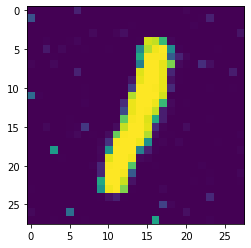

Epoch: 411	Loss:	disc total: 2.061e-01	gen: 2.530e+00	disc real: 2.757e-01	disc fake: 1.366e-01
Epoch: 412	Loss:	disc total: 2.395e-01	gen: 2.055e+00	disc real: 1.839e-01	disc fake: 2.951e-01
Epoch: 413	Loss:	disc total: 1.696e-01	gen: 2.431e+00	disc real: 2.108e-01	disc fake: 1.285e-01
Epoch: 414	Loss:	disc total: 2.570e-01	gen: 2.610e+00	disc real: 3.875e-01	disc fake: 1.264e-01
Epoch: 415	Loss:	disc total: 1.438e-01	gen: 2.620e+00	disc real: 1.842e-01	disc fake: 1.035e-01
Epoch: 416	Loss:	disc total: 2.237e-01	gen: 2.139e+00	disc real: 1.577e-01	disc fake: 2.897e-01
Epoch: 417	Loss:	disc total: 1.880e-01	gen: 2.115e+00	disc real: 1.614e-01	disc fake: 2.145e-01
Epoch: 418	Loss:	disc total: 1.875e-01	gen: 2.579e+00	disc real: 1.726e-01	disc fake: 2.024e-01
Epoch: 419	Loss:	disc total: 1.771e-01	gen: 2.093e+00	disc real: 1.613e-01	disc fake: 1.930e-01
Epoch: 420	Loss:	disc total: 1.579e-01	gen: 2.534e+00	disc real: 9.454e-02	disc fake: 2.212e-01


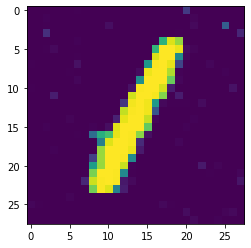

Epoch: 421	Loss:	disc total: 1.391e-01	gen: 2.858e+00	disc real: 7.889e-02	disc fake: 1.994e-01
Epoch: 422	Loss:	disc total: 2.234e-01	gen: 3.182e+00	disc real: 1.644e-01	disc fake: 2.825e-01
Epoch: 423	Loss:	disc total: 1.928e-01	gen: 2.381e+00	disc real: 1.049e-01	disc fake: 2.808e-01
Epoch: 424	Loss:	disc total: 2.392e-01	gen: 2.922e+00	disc real: 2.504e-01	disc fake: 2.280e-01
Epoch: 425	Loss:	disc total: 1.385e-01	gen: 2.229e+00	disc real: 5.534e-02	disc fake: 2.217e-01
Epoch: 426	Loss:	disc total: 2.306e-01	gen: 2.653e+00	disc real: 2.435e-01	disc fake: 2.178e-01
Epoch: 427	Loss:	disc total: 3.157e-01	gen: 2.575e+00	disc real: 1.651e-01	disc fake: 4.663e-01
Epoch: 428	Loss:	disc total: 1.290e-01	gen: 2.637e+00	disc real: 1.376e-01	disc fake: 1.203e-01
Epoch: 429	Loss:	disc total: 1.257e-01	gen: 2.966e+00	disc real: 9.848e-02	disc fake: 1.529e-01
Epoch: 430	Loss:	disc total: 1.891e-01	gen: 2.903e+00	disc real: 2.454e-01	disc fake: 1.328e-01


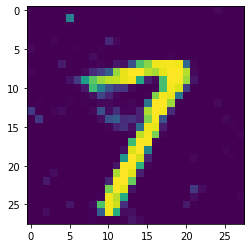

Epoch: 431	Loss:	disc total: 1.893e-01	gen: 3.086e+00	disc real: 2.898e-01	disc fake: 8.884e-02
Epoch: 432	Loss:	disc total: 1.920e-01	gen: 2.556e+00	disc real: 2.058e-01	disc fake: 1.782e-01
Epoch: 433	Loss:	disc total: 1.657e-01	gen: 2.475e+00	disc real: 1.734e-01	disc fake: 1.580e-01
Epoch: 434	Loss:	disc total: 1.635e-01	gen: 2.572e+00	disc real: 1.938e-01	disc fake: 1.331e-01
Epoch: 435	Loss:	disc total: 1.821e-01	gen: 2.196e+00	disc real: 2.061e-01	disc fake: 1.580e-01
Epoch: 436	Loss:	disc total: 1.491e-01	gen: 2.265e+00	disc real: 1.353e-01	disc fake: 1.629e-01
Epoch: 437	Loss:	disc total: 2.136e-01	gen: 2.399e+00	disc real: 2.052e-01	disc fake: 2.220e-01
Epoch: 438	Loss:	disc total: 2.151e-01	gen: 2.019e+00	disc real: 1.086e-01	disc fake: 3.216e-01
Epoch: 439	Loss:	disc total: 2.153e-01	gen: 2.482e+00	disc real: 1.651e-01	disc fake: 2.654e-01
Epoch: 440	Loss:	disc total: 2.246e-01	gen: 2.702e+00	disc real: 1.476e-01	disc fake: 3.016e-01


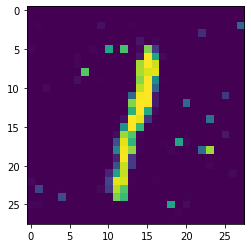

Epoch: 441	Loss:	disc total: 2.106e-01	gen: 2.763e+00	disc real: 3.100e-01	disc fake: 1.112e-01
Epoch: 442	Loss:	disc total: 1.396e-01	gen: 2.293e+00	disc real: 1.559e-01	disc fake: 1.233e-01
Epoch: 443	Loss:	disc total: 2.450e-01	gen: 2.294e+00	disc real: 2.874e-01	disc fake: 2.026e-01
Epoch: 444	Loss:	disc total: 2.271e-01	gen: 2.640e+00	disc real: 1.729e-01	disc fake: 2.813e-01
Epoch: 445	Loss:	disc total: 1.804e-01	gen: 2.008e+00	disc real: 1.200e-01	disc fake: 2.407e-01
Epoch: 446	Loss:	disc total: 2.795e-01	gen: 2.648e+00	disc real: 1.081e-01	disc fake: 4.508e-01
Epoch: 447	Loss:	disc total: 1.952e-01	gen: 2.968e+00	disc real: 1.069e-01	disc fake: 2.835e-01
Epoch: 448	Loss:	disc total: 1.365e-01	gen: 1.786e+00	disc real: 1.760e-01	disc fake: 9.709e-02
Epoch: 449	Loss:	disc total: 2.364e-01	gen: 2.786e+00	disc real: 3.711e-01	disc fake: 1.016e-01
Epoch: 450	Loss:	disc total: 2.551e-01	gen: 2.804e+00	disc real: 3.797e-01	disc fake: 1.305e-01


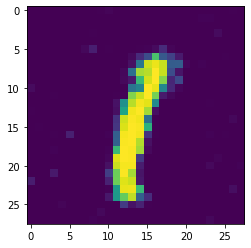

Epoch: 451	Loss:	disc total: 1.542e-01	gen: 2.009e+00	disc real: 9.412e-02	disc fake: 2.143e-01
Epoch: 452	Loss:	disc total: 1.604e-01	gen: 2.397e+00	disc real: 2.001e-01	disc fake: 1.207e-01
Epoch: 453	Loss:	disc total: 2.437e-01	gen: 2.311e+00	disc real: 2.617e-01	disc fake: 2.256e-01
Epoch: 454	Loss:	disc total: 2.374e-01	gen: 2.563e+00	disc real: 6.448e-02	disc fake: 4.103e-01
Epoch: 455	Loss:	disc total: 2.059e-01	gen: 2.103e+00	disc real: 2.581e-01	disc fake: 1.536e-01
Epoch: 456	Loss:	disc total: 1.965e-01	gen: 2.401e+00	disc real: 2.374e-01	disc fake: 1.556e-01
Epoch: 457	Loss:	disc total: 1.837e-01	gen: 2.363e+00	disc real: 1.620e-01	disc fake: 2.054e-01
Epoch: 458	Loss:	disc total: 2.913e-01	gen: 2.228e+00	disc real: 2.933e-01	disc fake: 2.894e-01
Epoch: 459	Loss:	disc total: 1.953e-01	gen: 2.993e+00	disc real: 2.591e-01	disc fake: 1.315e-01
Epoch: 460	Loss:	disc total: 2.503e-01	gen: 2.480e+00	disc real: 2.682e-01	disc fake: 2.323e-01


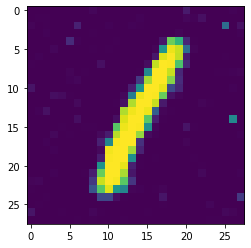

Epoch: 461	Loss:	disc total: 1.850e-01	gen: 2.943e+00	disc real: 2.585e-01	disc fake: 1.114e-01
Epoch: 462	Loss:	disc total: 2.033e-01	gen: 3.480e+00	disc real: 2.520e-01	disc fake: 1.547e-01
Epoch: 463	Loss:	disc total: 2.607e-01	gen: 3.226e+00	disc real: 3.646e-01	disc fake: 1.568e-01
Epoch: 464	Loss:	disc total: 2.355e-01	gen: 2.807e+00	disc real: 3.881e-01	disc fake: 8.302e-02
Epoch: 465	Loss:	disc total: 2.136e-01	gen: 2.702e+00	disc real: 1.553e-01	disc fake: 2.718e-01
Epoch: 466	Loss:	disc total: 2.131e-01	gen: 3.746e+00	disc real: 1.814e-01	disc fake: 2.449e-01
Epoch: 467	Loss:	disc total: 1.680e-01	gen: 2.844e+00	disc real: 2.457e-01	disc fake: 9.036e-02
Epoch: 468	Loss:	disc total: 2.030e-01	gen: 2.127e+00	disc real: 2.623e-01	disc fake: 1.437e-01
Epoch: 469	Loss:	disc total: 1.678e-01	gen: 2.995e+00	disc real: 2.425e-01	disc fake: 9.305e-02
Epoch: 470	Loss:	disc total: 1.771e-01	gen: 2.949e+00	disc real: 2.833e-01	disc fake: 7.092e-02


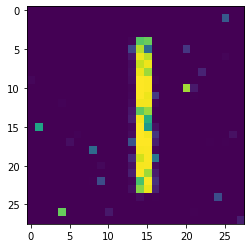

Epoch: 471	Loss:	disc total: 2.163e-01	gen: 3.163e+00	disc real: 2.681e-01	disc fake: 1.645e-01
Epoch: 472	Loss:	disc total: 1.930e-01	gen: 3.070e+00	disc real: 2.369e-01	disc fake: 1.491e-01
Epoch: 473	Loss:	disc total: 3.536e-01	gen: 3.048e+00	disc real: 2.909e-01	disc fake: 4.162e-01
Epoch: 474	Loss:	disc total: 1.382e-01	gen: 2.341e+00	disc real: 1.945e-01	disc fake: 8.185e-02
Epoch: 475	Loss:	disc total: 2.222e-01	gen: 2.759e+00	disc real: 2.887e-01	disc fake: 1.557e-01
Epoch: 476	Loss:	disc total: 1.949e-01	gen: 2.298e+00	disc real: 1.953e-01	disc fake: 1.945e-01
Epoch: 477	Loss:	disc total: 1.754e-01	gen: 2.690e+00	disc real: 2.398e-01	disc fake: 1.111e-01
Epoch: 478	Loss:	disc total: 3.589e-01	gen: 3.143e+00	disc real: 5.409e-01	disc fake: 1.769e-01
Epoch: 479	Loss:	disc total: 1.875e-01	gen: 2.249e+00	disc real: 2.445e-01	disc fake: 1.305e-01
Epoch: 480	Loss:	disc total: 2.221e-01	gen: 2.617e+00	disc real: 2.033e-01	disc fake: 2.409e-01


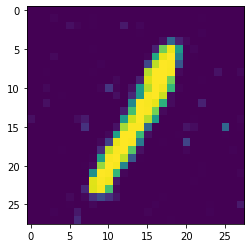

Epoch: 481	Loss:	disc total: 2.072e-01	gen: 2.525e+00	disc real: 1.929e-01	disc fake: 2.215e-01
Epoch: 482	Loss:	disc total: 2.335e-01	gen: 2.760e+00	disc real: 2.071e-01	disc fake: 2.599e-01
Epoch: 483	Loss:	disc total: 1.819e-01	gen: 2.616e+00	disc real: 2.226e-01	disc fake: 1.413e-01
Epoch: 484	Loss:	disc total: 1.766e-01	gen: 2.523e+00	disc real: 2.407e-01	disc fake: 1.124e-01
Epoch: 485	Loss:	disc total: 2.819e-01	gen: 3.029e+00	disc real: 3.307e-01	disc fake: 2.330e-01
Epoch: 486	Loss:	disc total: 2.201e-01	gen: 2.426e+00	disc real: 2.979e-01	disc fake: 1.423e-01
Epoch: 487	Loss:	disc total: 1.537e-01	gen: 2.758e+00	disc real: 1.922e-01	disc fake: 1.152e-01
Epoch: 488	Loss:	disc total: 1.859e-01	gen: 2.496e+00	disc real: 2.777e-01	disc fake: 9.409e-02
Epoch: 489	Loss:	disc total: 1.323e-01	gen: 2.503e+00	disc real: 1.687e-01	disc fake: 9.581e-02
Epoch: 490	Loss:	disc total: 1.409e-01	gen: 2.615e+00	disc real: 1.686e-01	disc fake: 1.133e-01


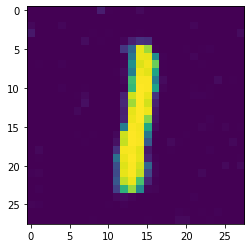

Epoch: 491	Loss:	disc total: 1.587e-01	gen: 2.789e+00	disc real: 1.791e-01	disc fake: 1.382e-01
Epoch: 492	Loss:	disc total: 1.871e-01	gen: 2.946e+00	disc real: 2.565e-01	disc fake: 1.177e-01
Epoch: 493	Loss:	disc total: 2.187e-01	gen: 2.181e+00	disc real: 3.031e-01	disc fake: 1.343e-01
Epoch: 494	Loss:	disc total: 2.687e-01	gen: 3.347e+00	disc real: 3.722e-01	disc fake: 1.651e-01
Epoch: 495	Loss:	disc total: 1.684e-01	gen: 2.525e+00	disc real: 1.495e-01	disc fake: 1.874e-01
Epoch: 496	Loss:	disc total: 2.040e-01	gen: 2.945e+00	disc real: 2.833e-01	disc fake: 1.248e-01
Epoch: 497	Loss:	disc total: 2.313e-01	gen: 2.363e+00	disc real: 2.656e-01	disc fake: 1.970e-01
Epoch: 498	Loss:	disc total: 1.842e-01	gen: 2.590e+00	disc real: 2.275e-01	disc fake: 1.409e-01
Epoch: 499	Loss:	disc total: 2.448e-01	gen: 2.256e+00	disc real: 2.726e-01	disc fake: 2.170e-01


In [16]:
epochs = 500
batch_size = 32
image_size = 28
kg = 1 
kd = 1
gen_hist = []
disc_fake_hist = []
disc_real_hist = []
train_data2 = train_data.take(5000) #5000
for epoch in range(epochs):

    for batch, (real_x, _) in enumerate(train_data2.batch(batch_size)):

        # train the discriminator
        for disc_steps in range(kd):
            
            real_x = tf.convert_to_tensor(real_x)
        
            with tf.GradientTape() as disc_tape:
                # fake images using generator with noise inputs
                noise = tf.convert_to_tensor(
                    tf.random.normal((batch_size, image_size, image_size)))
                
                fake_x = generator(noise)

                # run discriminator on fake and real data
                disc_pred_fake = discriminator((fake_x+1)*127.5)
                disc_pred_real = discriminator(real_x)

                # paper
                real_loss = (tf.keras.losses.BinaryCrossentropy()\
                    (tf.ones_like(disc_pred_real), disc_pred_real))
                
                fake_loss = (tf.keras.losses.BinaryCrossentropy()\
                    (tf.zeros_like(disc_pred_fake), disc_pred_fake))

                
                disc_loss = 0.5*(real_loss + fake_loss)

            # update the discriminator
            disc_grads = disc_tape.gradient(disc_loss, 
                                            discriminator.trainable_weights)
            disc_optimizer.apply_gradients(
                zip(disc_grads, discriminator.trainable_weights))   
    
        # train the generator
        for gen_steps in range(kg):
            with tf.GradientTape() as gen_tape:

                noise = tf.convert_to_tensor(
                            tf.random.normal((batch_size, image_size, image_size)))
                
                fake_x = generator(noise)
                
                disc_pred_fake = discriminator((fake_x+1)*127.5)

                gen_loss = tf.keras.losses.BinaryCrossentropy()\
                    (tf.ones_like(disc_pred_fake), disc_pred_fake)

            gen_grads = gen_tape.gradient(gen_loss, 
                                                generator.trainable_weights)
            gen_optimizer.apply_gradients(
                        zip(gen_grads, generator.trainable_weights))


    if epoch % 1 == 0:
        print(f"Epoch: {epoch}\tLoss:\tdisc total: {disc_loss:.3e}\tgen: {gen_loss:.3e}\tdisc real: {real_loss:.3e}\tdisc fake: {fake_loss:.3e}")
        gen_hist.append(gen_loss)
        disc_fake_hist.append(fake_loss)
        disc_real_hist.append(real_loss)
    if epoch % 10 ==0:
        plt.imshow(tf.squeeze((fake_x[0]+1)*127.5))
        plt.show()
    



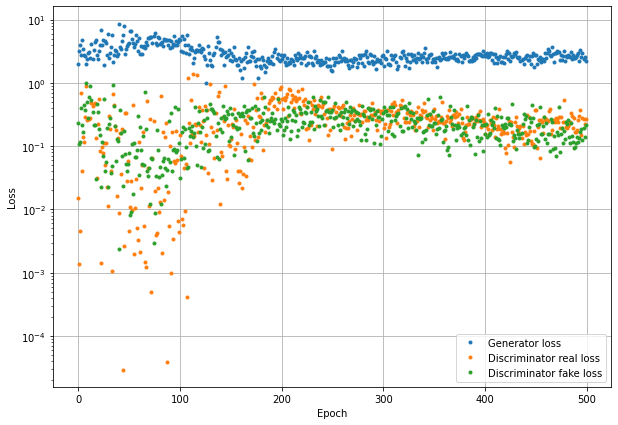

In [17]:
plt.figure(figsize=(10,7))
plt.semilogy(gen_hist, ".", label="Generator loss")
plt.semilogy(disc_real_hist, ".", label="Discriminator real loss")
plt.semilogy(disc_fake_hist, ".", label="Discriminator fake loss")
plt.legend()
plt.grid()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()


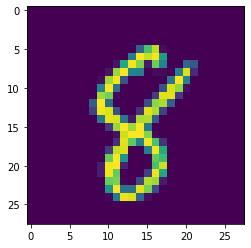

In [18]:
plt.imshow(tf.squeeze(real_x[0]))

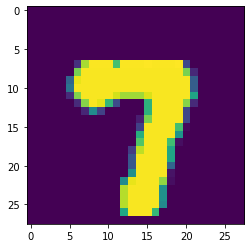

Discriminator prediction on real sample 0.43


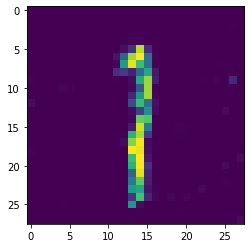

Discriminator prediction on fake sample 0.54


In [19]:
real_x = x_train[np.random.choice(x_train.shape[0]),:,:]
plt.imshow(real_x)
plt.show()
print(f"Discriminator prediction on real sample {float(discriminator(tf.expand_dims(real_x, axis=0))):.2f}")

noise = tf.convert_to_tensor(tf.random.normal((image_size, image_size)))
fake_x = generator(tf.expand_dims(noise,axis=0))           
disc_pred_fake = discriminator((fake_x+1)*127.5)
plt.imshow((tf.squeeze(fake_x)+1)*127.5)
plt.show()
print(f"Discriminator prediction on fake sample {float(discriminator((fake_x+1)*127.5)):.2f}")


In [20]:
generator.save("generator")
discriminator.save("discriminator")

INFO:tensorflow:Assets written to: generator/assets
INFO:tensorflow:Assets written to: discriminator/assets


In [21]:
!zip -r generator.zip generator/
!zip -r discriminator.zip discriminator/

  adding: generator/ (stored 0%)
  adding: generator/saved_model.pb (deflated 90%)
  adding: generator/assets/ (stored 0%)
  adding: generator/keras_metadata.pb (deflated 92%)
  adding: generator/variables/ (stored 0%)
  adding: generator/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: generator/variables/variables.index (deflated 67%)
  adding: discriminator/ (stored 0%)
  adding: discriminator/saved_model.pb (deflated 89%)
  adding: discriminator/assets/ (stored 0%)
  adding: discriminator/keras_metadata.pb (deflated 90%)
  adding: discriminator/variables/ (stored 0%)
  adding: discriminator/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: discriminator/variables/variables.index (deflated 53%)
